# Media Bias Classification - Predicting News Article Bias

# Table of Contents


1. [Motivation](#Motivation)
<a href="Motivation"></a>

2. [Data Extraction](#Data_Extraction)
<a href="DataExtraction"></a>

3. [Data Preprocessing](#Data_Preprocessing)
<a hrwf="Data_Preprocessing"></a>

4. [Exploratory Data Analysis](#EDA)
<a hrwf="EDA"></a>

5. [Machine Learning](#ML)
<a hrwf="ML"></a>
    1. [Universal Sentence Encoder](#USE)
    <a hrwf="USE"></a>
    2. [Word2Vec](#w2v)
    <a hrwf="w2v"></a>
    3. [Logistic Regression](#LR)
    <a hrwf="LR"></a>
    4. [Deep Learning Model](#DL)
    <a hrwf="DL"></a>

7. [Conclusion](#Conclusion)
<a hrwf="Conclusion"></a>

8. [References](#References)
<a hrwf="References"></a>

<a id='Motivation'></a>

# Motivation

In recent times, although very few of us read the newspaper, we all follow news channels on Twitter, have a news articles app on our phone and consume news, more specifically political news, from one source or another on a daily basis. There are about 10-12 top news channels that all of us follow, but have you ever wondered if these channels are truly neutral, and do not use their worldwide presence to steer the political views of their readers?

There is an age-old debate across countries about how media channels and the press have a strong influence on the public’s political opinions and inclinations. Any regular news viewer may already have developed their own view on where on political spectrum does each news channel lie. On several occassions, we have personally come across news stories where  we can tell the political inclination right away. 

So for this project, we felt it would be interesting to analyze articles from 12 news channels and try to gauge where on the political spectrum do they lie. Further, given an article from an unknown source, we will also be predicting the political inclinations of the writer.

Before we begin, here is a overview of what it means to be left wing or ring wing. 
#### Left Wing - 
"Left-wing is characterized by an emphasis on "ideas such as freedom, equality, fraternity, rights, progress, reform and internationalism"
#### Right Wing - 
"Right-wing is characterized by an emphasis on "notions such as authority, hierarchy, order, duty, tradition, reaction and nationalism"

<a id='Data_Extraction'></a>
# Data Extraction



The data for this project was extracted from newapi.com. We used AllSides as the initial indicated of media bias. We then extracted several articles from several media sources tagged left, neutral and right such as CNN, BBC, Bloomberg etc. 
As per AllSides, media channels are biased as follows:

### Left Biased
- The New York Times
- CNN
- The Washington Post
- Al Jazeera English

### Neutral
- Associated Press
- BBC News
- The Hill
- Reuters

### Right Biased
- Breibart News
- Fox News
- National Review
- The American Conservative

<img src="AllSidesMediaBiasChart.jpg" style = "width: 500px; height: 550px" align = left>


## Extracting articles from Newsapi
The NewsApi gives us the concatenated article content with other basic article information including the url of the full article, article description, and the release date. We will use the url extracted from newsapi for each article to retrieve the full contents of the articles by using the Python Newspaper3k package. Newspaper3k is an amazing python library for extracting & curating articles

We use the following key words to extract the articles:
- Politics
- Elections
- World Politics

In [2]:
%matplotlib inline

import requests
import pandas as pd
import matplotlib.pyplot as plt
from newspaper import Article
import newspaper
from pathlib import Path


import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
from textblob import TextBlob
import collections

from sklearn.manifold import TSNE
from adjustText import adjust_text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sayee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sayee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Function to read the APIkey from a file 
def read_api_key(filepath="api_key.txt"):
    """
    Read the NewsAPI Key from file.
    
    Args:
        filepath (string): File containing API Key
    Returns:
        api_key (str`ing): The API Key
    """
    
    # Feel free to modify this function if you are storing the API Key differently
    return Path(filepath).read_text().strip()

In [10]:
# Function to create a list left wing, right wing and neutral sources 

def sources():
    left_sources = ["the-new-york-times","cnn","the-washington-post","al-jazeera-english"]
    neutral_sources = ["associated-press","bbc-news","the-hill","reuters"]
    right_sources = ["breitbart-news","fox-news","national-review","the-american-conservative"]
    
    return left_sources,neutral_sources,right_sources

In [19]:
# Function to extract articles from newsAPI

def extract_articles():
    
    left_sources,neutral_sources, right_sources = sources()

    left_news = {}
    neutral_news = {}
    right_news = {}

    apiKey = read_api_key()

    for source in left_sources: 
        url = ('https://newsapi.org/v2/everything?q=politics&sources='+source+'&apiKey='+apiKey+'&pageSize=100')
        response = requests.get(url)
        response_list = response.json().get('articles')
        left_news[source] = response_list

    for source in neutral_sources: 
        url = ('https://newsapi.org/v2/everything?q=politics&sources='+source+'&apiKey='+apiKey+'&pageSize=100')
        response = requests.get(url)
        response_list = response.json().get('articles')
        neutral_news[source] = response_list

    for source in right_sources: 
        url = ('https://newsapi.org/v2/everything?q=politics&sources='+source+'&apiKey='+apiKey+'&pageSize=100')
        response = requests.get(url)
        response_list = response.json().get('articles')
        right_news[source] = response_list


    for source in left_sources: 
        url = ('https://newsapi.org/v2/everything?q=elections&sources='+source+'&apiKey='+apiKey+'&pageSize=100')
        response = requests.get(url)
        response_list = response.json().get('articles')
        for r in response_list:
            left_news[source].append(r)

    for source in neutral_sources: 
        url = ('https://newsapi.org/v2/everything?q=elections&sources='+source+'&apiKey='+apiKey+'&pageSize=100')
        response = requests.get(url)
        response_list = response.json().get('articles')
        for r in response_list:
            neutral_news[source].append(r)

    for source in right_sources: 
        url = ('https://newsapi.org/v2/everything?q=elections&sources='+source+'&apiKey='+apiKey+'&pageSize=100')
        response = requests.get(url)
        response_list = response.json().get('articles')
        for r in response_list:
            right_news[source].append(r)

    for source in left_sources: 
        url = ('https://newsapi.org/v2/everything?q=world%20politics&sources='+source+'&apiKey='+apiKey+'&pageSize=100')
        response = requests.get(url)
        response_list = response.json().get('articles')
        for r in response_list:
            left_news[source].append(r)

    for source in neutral_sources: 
        url = ('https://newsapi.org/v2/everything?q=world%20politics&sources='+source+'&apiKey='+apiKey+'&pageSize=100')
        response = requests.get(url)
        response_list = response.json().get('articles')
        for r in response_list:
            neutral_news[source].append(r)

    for source in right_sources: 
        url = ('https://newsapi.org/v2/everything?q=world%20politics&sources='+source+'&apiKey='+apiKey+'&pageSize=100')
        response = requests.get(url)
        response_list = response.json().get('articles')
        for r in response_list:
            right_news[source].append(r)
            
    return left_news,neutral_news,right_news

left_news,neutral_news,right_news = extract_articles()

Let us now view of the the articles we have gotten from The new york times. We can see article information such as author, title, description, url and published date

In [22]:
print(left_news["the-new-york-times"][1])

{'source': {'id': 'the-new-york-times', 'name': 'The New York Times'}, 'author': 'Lisa Lerer and Jennifer Medina', 'title': 'What Does This Country Demand of Black Women in Politics?', 'description': 'After Kamala Harris’s departure from the presidential race, the people who saw their own paths reflected in hers are thinking about what comes next.', 'url': 'https://www.nytimes.com/2019/12/08/us/politics/kamala-harris-black-women.html', 'urlToImage': 'https://static01.nyt.com/images/2019/12/06/us/politics/0HARRIS-REPRESENTATION1/merlin_165011958_da739378-20bc-42fc-948f-a0df7fc16c5e-facebookJumbo.jpg', 'publishedAt': '2019-12-08T15:47:40Z', 'content': 'While record-breaking numbers of black women were elected to Congress last year, they have struggled to break into higher positions. A black woman has never served as governor, and only two have served in the Senate, Ms. Harris and Carol Moseley Braun, of Ill… [+1360 chars]'}


## Extract complete content of each article using newpapaper library of Python

We pass the url we got from the function extract_articles to retrieve the entire article content

In [23]:
def extract_article_content(left_news,neutral_news,right_news):
    
    url_set = set()

    for key, values in left_news.items():
        for value in values:
            article_url = value.get('url')
            if article_url not in url_set:
                url_set.add(article_url)
                article = Article(article_url)
                try:
                    article.download()
                    article.parse()
                    value['newspaper_content'] = article.text
                except newspaper.article.ArticleException:
                    pass
            else:
                pass

    for key, values in neutral_news.items():
        for value in values:
            article_url = value.get('url')
            if article_url not in url_set:
                url_set.add(article_url)
                article = Article(article_url)
                try:
                    article.download()
                    article.parse()
                    value['newspaper_content'] = article.text
                except newspaper.article.ArticleException:
                    pass
            else:
                pass

    for key, values in right_news.items():
        for value in values:
            article_url = value.get('url')
            if article_url not in url_set:
                url_set.add(article_url)
                article = Article(article_url)
                try:
                    article.download()
                    article.parse()
                    value['newspaper_content'] = article.text
                except newspaper.article.ArticleException:
                    pass
            else:
                pass
    return left_news,neutral_news,right_news

left_news,neutral_news,right_news = extract_article_content(left_news,neutral_news,right_news)

In [40]:
# let us now print the full content of one of the articles

keys = left_news.keys()
print(left_news['the-new-york-times'][5]['newspaper_content'])

WASHINGTON — When a House committee sued senior Trump administration officials this past week over their refusal to turn over details of the administration’s failed attempt to add a citizenship question to the 2020 census, it might have seemed a post-mortem to an issue long settled.

But five months after the Supreme Court blocked the question, a steady trickle of new disclosures in the case this past month has sharpened questions about whether Republican Party politics drove the effort to add the question to the head count — and whether the Trump administration tried to conceal that in court.

The disclosures, in a House of Representatives inquiry and a New York lawsuit, bolster existing evidence that a Republican political strategist, Thomas B. Hofeller, played at least an indirect role in crafting a legal rationale for adding the question to the census. They also indicate that a senior Census Bureau official and friend of Mr. Hofeller, Christa Jones, helped draft an explanation of t

### Making a Dataframe

Let us now convert this data into a usable format. We will create a DataFrame where each row will denote an article and the columns will represent the various article features. We will add a column called bias_index which will denote the political inclination of the article source as follows:

1. Left biased --> 0
2. Neutral biased --> 1
3. Right biased --> 2

In [137]:
# Converting to data frame and saving.

df=pd.DataFrame()
    
for k,v in left_news.items():
    df=df.append(v)

for k,v in neutral_news.items():
    df=df.append(v)

for k,v in right_news.items():
    df=df.append(v)

df.reset_index(inplace=True, drop=True)

source = df['source'].to_dict()
source_id=[]
source_name = []
for k,v in source.items():
    source_id.append(v.get('id'))
    source_name.append(v.get('name'))

df['source_id'] = source_id
df['source_name'] = source_name
del df['source']
df.drop_duplicates(subset=["newspaper_content"], inplace=True)
df.drop_duplicates(subset=["url"], inplace=True)

df.reset_index(inplace=True, drop=True)

# Merging bias index
source_df = pd.DataFrame(left_sources+neutral_sources+right_sources,columns=['source_id'])
zeros = [0 for x in left_sources]
ones = [1 for x in neutral_sources]
twos = [2 for x in right_sources]
final = zeros + ones + twos
source_df['bias_index'] = final
df = df.merge(source_df, left_on='source_id', right_on='source_id', how='left')


# Merging source index
source_df = pd.DataFrame(left_sources+neutral_sources+right_sources,columns=['source_id'])
source_list = []
for k in range(len(left_sources)*3):
    source_list.append(k)
source_df['source_index'] = source_list
df = df.merge(source_df, left_on='source_id', right_on='source_id', how='left')
df['newspaper_content'].replace('', np.nan, inplace=True)
df.dropna(subset =["newspaper_content"], inplace=True)
df.reset_index(inplace=True, drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 12 columns):
author               2298 non-null object
content              2312 non-null object
description          2350 non-null object
newspaper_content    2351 non-null object
publishedAt          2351 non-null object
title                2351 non-null object
url                  2351 non-null object
urlToImage           2346 non-null object
source_id            2351 non-null object
source_name          2351 non-null object
bias_index           2351 non-null int64
source_index         2351 non-null int64
dtypes: int64(2), object(10)
memory usage: 220.5+ KB


The dataframe has 2351 enteries, each corresponding to an article, and the following columns

In [138]:
df = df[pd.notnull(df['newspaper_content'])]

We will now export this dataframe into an excel file

In [140]:
df.to_excel("output.xlsx", index=False)

Let us read the excel file to proceed with our analysis

In [3]:
df = pd.read_excel('output.xlsx') 

Let us visualize the first 10 rows of the dataframe

In [4]:
display(df[:10])

,author,content,description,newspaper_content,publishedAt,title,url,urlToImage,source_id,source_name,bias_index,source_index
0,Bret Stephens,The fourth theme is covert Russian interferenc...,Why the president must be impeached and removed.,The fourth theme is covert Russian interferenc...,2019-11-23T01:28:12Z,Trump Ukrainianizes American Politics,https://www.nytimes.com/2019/11/22/opinion/tru...,https://static01.nyt.com/images/2019/11/22/opi...,the-new-york-times,The New York Times,0,0
1,Lisa Lerer and Jennifer Medina,While record-breaking numbers of black women w...,After Kamala Harris’s departure from the presi...,“I keep going back to a lot of people telling ...,2019-12-08T15:47:40Z,What Does This Country Demand of Black Women i...,https://www.nytimes.com/2019/12/08/us/politics...,https://static01.nyt.com/images/2019/12/06/us/...,the-new-york-times,The New York Times,0,0
2,NaN,Alexander Burns contributed reporting.\r\nThe ...,We spoke with the Vermont senator about his jo...,bernie sanders\n\nHello.\n\nmichael barbaro\n\...,2019-12-06T11:00:10Z,The Candidates: Bernie Sanders,https://www.nytimes.com/2019/12/06/podcasts/th...,https://static01.nyt.com/images/2019/12/06/pod...,the-new-york-times,The New York Times,0,0
3,Matt Flegenheimer and Katie Glueck,"Im part of that Obama coalition, Mr. Biden sai...",If combat is the sincerest form of flattery in...,“No time to waste — let’s get right to it.” “F...,2019-11-21T05:08:07Z,"The Electability Debate, Brought to You by the...",https://www.nytimes.com/2019/11/20/us/politics...,https://static01.nyt.com/images/2019/11/20/us/...,the-new-york-times,The New York Times,0,0
4,Charlie Savage,"To give just three examples:\r\nFirst, when ag...",A high-profile inspector general report has se...,"To give just three examples:\n\nFirst, when ag...",2019-12-11T18:03:24Z,We Just Got a Rare Look at National Security S...,https://www.nytimes.com/2019/12/11/us/politics...,https://static01.nyt.com/images/2019/12/10/us/...,the-new-york-times,The New York Times,0,0
5,Michael Wines,It is interesting that each and every document...,New documents hint at partisan politics in the...,WASHINGTON — When a House committee sued senio...,2019-11-30T10:00:11Z,A Census Whodunit: Why Was the Citizenship Que...,https://www.nytimes.com/2019/11/30/us/census-c...,https://static01.nyt.com/images/2019/11/29/us/...,the-new-york-times,The New York Times,0,0
6,Jennifer Medina,Mr. Castro has put forth the most ambitious an...,"“In our politics today, we’ve forgotten to tal...",One week after he was left off the Democratic ...,2019-11-27T10:00:28Z,"Julián Castro, in Plan to End Hunger, Warns Ag...",https://www.nytimes.com/2019/11/27/us/julian-c...,https://static01.nyt.com/images/2019/11/26/us/...,the-new-york-times,The New York Times,0,0
7,Nicholas Fandos,"Many of the actions in question, Republicans a...",In a report intended to counter Democrats’ imp...,"michael barbaro\n\nFrom The New York Times, I’...",2019-12-02T20:49:44Z,Republican Impeachment Defense Claims Trump’s ...,https://www.nytimes.com/2019/12/02/us/politics...,https://static01.nyt.com/images/2019/12/02/us/...,the-new-york-times,The New York Times,0,0
8,Elizabeth Dias and Lisa Lerer,"Ilyse Hogue, president of the abortion rights ...","Miscalculations, and an unexpected victory by ...","But unlike support for same-sex marriage, whic...",2019-12-01T10:00:11Z,How a Divided Left Is Losing the Battle on Abo...,https://www.nytimes.com/2019/12/01/us/politics...,https://static01.nyt.com/images/2019/12/01/us/...,the-new-york-times,The New York Times,0,0
9,Jamelle Bouie,"Yes, the failure of explicitly woke campaigns ...",If the fantasy that Democrats are all zealots ...,"Democrats are too “woke” for their own good, o...",2019-12-06T11:00:07Z,Why the ‘Wokest’ Candidates Are the Weakest,https://www.nytimes.com/2019/12/06/opinion/wok...,https://static01.nyt.com/images/2019/12/06/opi...,the-new-york-times,The New York Times,0,0


<a id='Data_Preprocessing'></a>

## Data Preprocessing



In [5]:
import numpy as np

In [6]:
def preprocess(list_of_articles):
    item = []
    num_of_words =[]
    words = []
    for article in list_of_articles:
        tokenizer = RegexpTokenizer(r'\w+')
        word_tokens = tokenizer.tokenize(article.lower())
        filtered_words = [w for w in word_tokens if not w in stop_words] 
        lemmatizer = WordNetLemmatizer() 
        processed_content = list(map(lambda x: lemmatizer.lemmatize(x), filtered_words))
        words.append(processed_content)
        sentence = ' '.join(processed_content)  
        item.append(sentence)
        num_of_words.append(len(processed_content))
    return item,num_of_words,words

In [11]:
# Making combined article list and combined article index
left_sources,neutral_sources,right_sources = sources()
combined_article_list = df.newspaper_content.to_list()
combined_article_index = np.asarray(df.bias_index.to_list())

In [25]:
# Remove bias words

words_to_replace = left_sources + neutral_sources + right_sources + ["new york times","cnn","the washington post","washington post","associated press", "bbc", "the hill","breitbart", "fox", "national review","al jazeera", "american conservative", "said"]

for i,document in enumerate(combined_article_list):
    for word in words_to_replace:
        combined_article_list[i] = combined_article_list[i].lower().replace(word,"")

We now have all the articles in a list named combined_article_list and another list called combined_article_index which has the corresponding label for each article

In [26]:
print(combined_article_list[0])

the fourth theme is covert russian interference, usually facilitated by local actors.

ukraine offers the world’s most extreme example of this kind of interference (nearby georgia is a close second), since large parts of the country have been seized outright by russia and its proxies. but long before the kremlin’s “little green men” arrived in crimea in 2014, russia and its agents were using every dirty trick at their disposal, from poisoning a future ukrainian president with dioxin to poisoning the media landscape with disinformation. too often, it worked, whether because its victims were suggestible, corrupt, fearful or simply not paying attention.

that last point was also made by fiona hill in her testimony on thursday, where she warned members of the house intelligence committee that they ran the risk of themselves falling victims to “politically driven falsehoods,” regarding a bogus theory about ukrainian political interference, “that so clearly advance russian interests.”

yet t

**Let us now try to print the number of articles we have fetched per source**

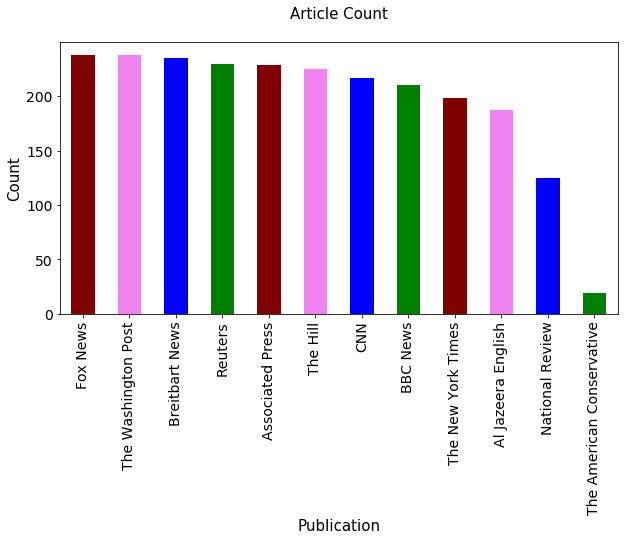

In [27]:
ax = df['source_name'].value_counts().plot(kind='bar', fontsize=14, figsize=(10,5),color=['maroon', 'violet','blue', 'green'])
ax.set_title('Article Count\n', fontsize=15)
ax.set_xlabel('Publication', fontsize=15)
ax.set_ylabel('Count', fontsize=15);

We see that National Review and American Conservative have less articles, this is important to note now as it can be used to understand any performance issues or outliers in analysis further in the project.

<a id='EDA'></a>

# Exploratory Data Analysis

Subsequently, we performed basic EDA by visualizing the average number of words per article across sources and the average polarity of the sources per article. Another interesting insight we derived was the most common words and sentences used in different articles with different political inclinations.


### Number of words per article

The mean number of words per article is: 462.0004253509145
The median number of words per article is: 352.0


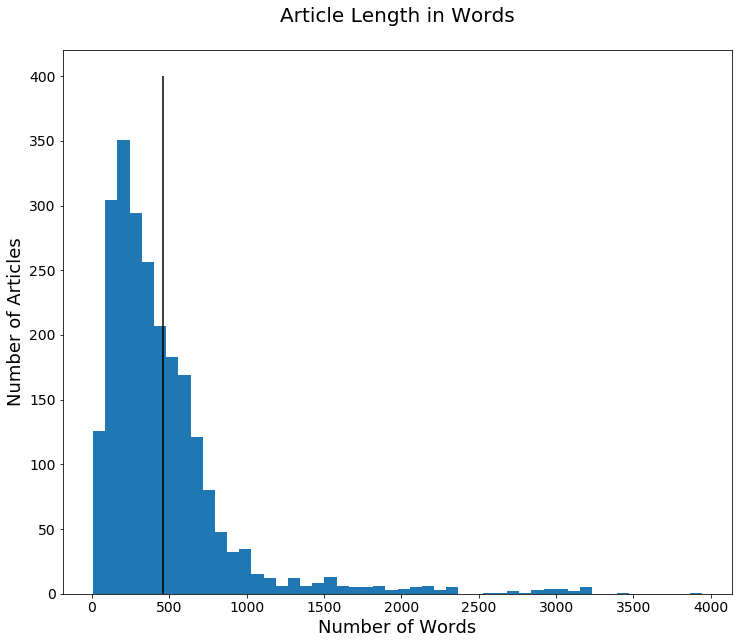

In [28]:
#Plot the number of words per article

content = df['newspaper_content'].tolist()
content, num_of_words, words = preprocess(content)
df2=pd.DataFrame()
df2['content']= content
df2['num_of_words'] = num_of_words
df2['source_id'] = df['source_id']
ax=df2['num_of_words'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Number of Articles', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18)
ax.vlines(df2['num_of_words'].mean(), ymin=0, ymax=400, label= "Mean")
print("The mean number of words per article is:", df2['num_of_words'].mean())
print("The median number of words per article is:", df2['num_of_words'].median())

### Average number of words per article per source

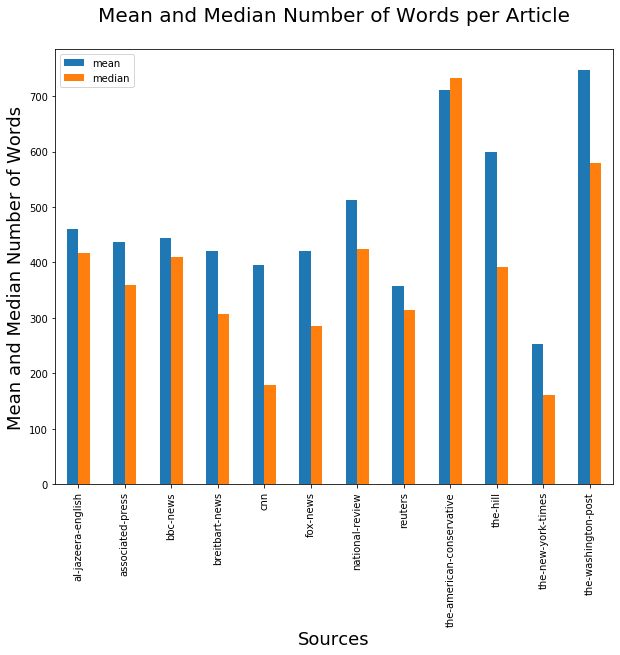

In [29]:
#The number of articles per source
df3=pd.DataFrame()
df3['mean'] = df2.groupby('source_id').mean()['num_of_words']
df3['median'] = df2.reset_index().groupby('source_id').median()['num_of_words']
ax = df3.reset_index().plot(x='source_id', y=['mean', 'median'], kind='bar',figsize=(10,8))
ax.set_title('Mean and Median Number of Words per Article\n', fontsize=20)
ax.set_ylabel('Mean and Median Number of Words', fontsize=18)
ax.set_xlabel('Sources', fontsize=18);

Not significant variation here in terms of number of median words per article leaving a few outliars.

### Determining the polarity of an article

In [30]:
import statistics

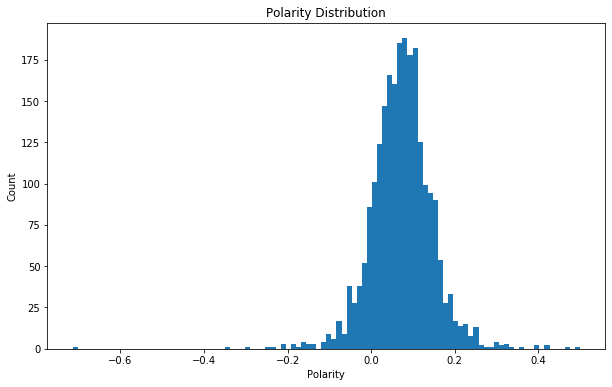

We can visually see that the average polarity of all articles if slightly greater than 0
The mean polarity of all articles is  0.07288362428175604
The maximum polarity of all the articles is  0.5
The minimum polarity of all the articles is  -0.7142857142857143


In [31]:
#Plotting per article sentiment, ie. sentiment per source
polarity = [TextBlob(article).sentiment.polarity for article in combined_article_list]
df['polarity'] = polarity

plt.figure(figsize = (10,6))
plt.hist(df.polarity, 100)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Polarity Distribution')
plt.show()

print("We can visually see that the average polarity of all articles if slightly greater than 0")

print("The mean polarity of all articles is ", statistics.mean(polarity))
print("The maximum polarity of all the articles is ",max(polarity))
print("The minimum polarity of all the articles is ", min(polarity))


### Average polarity per source

Let us now visualize the average polarity per source and see if there is a trend

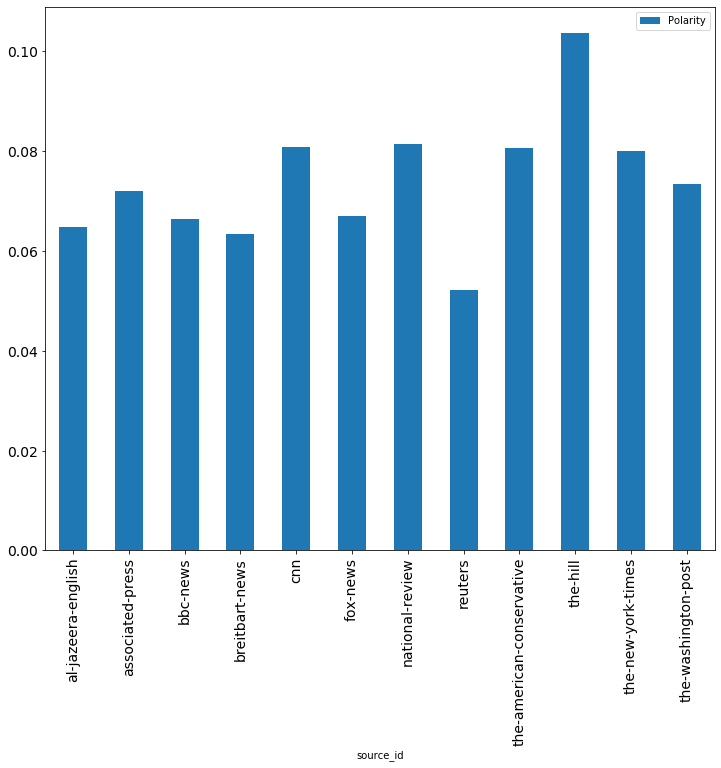

In [32]:
df4=pd.DataFrame()
df4['Polarity'] = df.groupby('source_id')['polarity'].mean()
df4.reset_index().plot(x='source_id',y=['Polarity'],kind='bar',fontsize=14, figsize=(12,10))

### WordCloud

Let us view the wordcloud using a list of left, right and neutrally biased articles


In [33]:
from wordcloud import WordCloud

In [34]:
# function to create a list of words used for wordcloud

def words_for_wordcloud():
    index_count = collections.Counter(combined_article_index)

    left_count = index_count[0]
    neutral_count = index_count[1]
    right_count = index_count[2]

    left_words= ""
    right_words= ""
    neutral_words= ""

    for i in range(left_count):
        left_words += combined_article_list[i]

    for i in range(left_count,left_count+neutral_count):
        neutral_words += combined_article_list[i]

    for i in range(left_count+neutral_count,left_count+neutral_count+right_count):
        right_words += combined_article_list[i]
        
    return left_words,neutral_words, right_words

left_words,neutral_words, right_words = words_for_wordcloud()

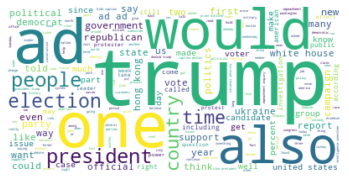

In [35]:
plt.figure(figsize = (6,5))
wordcloud = WordCloud( background_color="white",stopwords=stop_words).generate(left_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

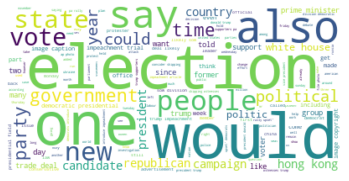

In [36]:
plt.figure(figsize = (6,5))
wordcloud = WordCloud( background_color="white",stopwords=stop_words).generate(neutral_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

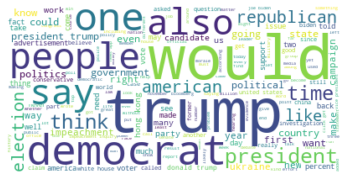

In [37]:
plt.figure(figsize = (6,5))
wordcloud = WordCloud( background_color="white",stopwords=stop_words).generate(right_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As you may have guessed, 'democrat' is one of the most common words occuring in articles tagged as right inclined and 'democrat' is hardly a common word in neutral or left inlcined articles. Thus this basic EDA itself gives us a fair idea that our hypothesis about news channels being biased in their articles may be true

<a id='ML'></a>

# Machine Learning Algorithms



In [38]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns
from sklearn.metrics import confusion_matrix



import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import tensorflow_hub as hub

from keras.regularizers import l1, l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import backend
from tensorflow.keras import optimizers

Instructions for updating:
non-resource variables are not supported in the long term


Using TensorFlow backend.


<a id='USE'></a>

## Converting sentences to an encoded format using Universal Sentence Encoder

Before we can fit any classification model to the data to predict the article bias, we first need to determine the features that can be used in a machine learning model. Currenlty we have articles, which are basically a list of sentences. We need to encode sentences into into embedding vectors that accurately represent our data. 

The Universal Sentence Encoder (Cer et al., 2018) is a versatile sentence embedding models that encodes textual data into a 512 dimensional vector that can be used for text classification and other Natural Language tasks. Each article is thus represented by one such vector that capture rich semantic information about the data. 

## Visualize vector embeddings

### TSNE

T-distributed Stochastic Neighbor Embedding (t-SNE) is a machine learning algorithm for visualization developed by Laurens van der Maaten and Geoffrey Hinton. It is a nonlinear dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions. Specifically, it models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability. We will be using 30 as the perplexity
     - Source: Wikipedia

In [39]:
# Function to plot any vector in x-y 2D plane to visualize.
def plot_tsne(vector, perplexity,df):
  # Refer: https://nbviewer.jupyter.org/github/chambliss/Notebooks/blob/master/Word2Vec_News_Analysis.ipynb
    tsne = TSNE(n_components = 2, init = 'random', perplexity=perplexity)
    tsne_df = tsne.fit_transform(vector)
    sns.set()
    fig, ax = plt.subplots(figsize = (20, 12))
    sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)
    title_plot = list(np.arange(0, len(df), 200))
    title_list = df.title.to_list()
    titles = []
    for title in title_plot:
        titles.append(plt.text(tsne_df[title, 0], tsne_df[title, 1], title_list[title], fontsize = 16))
    adjust_text(titles, force_points = 0.6, force_text = 0.6, expand_points = (2,1), expand_text = (1,4), arrowprops = dict(arrowstyle = "->", color = 'red', lw = 0.5))
    plt.show()

In [40]:
def UniversalSentenceEncoder(articles_list):
    g = tf.Graph()
    with g.as_default():
        text_input = tf.placeholder(dtype=tf.string, shape=[None])
        embed = hub.Module("https://tfhub.dev/google/universal-sentence-encoder-large/3")
        embedded_text = embed(text_input)
        init_op = tf.group([tf.global_variables_initializer(), tf.tables_initializer()])
    g.finalize()

    # Initialize session:
    session = tf.Session(graph=g)
    session.run(init_op)
    # Iniialize embeddings
    emb_all = np.zeros([len(articles_list),512])
    #Outer for loop:
    for i in range(0,len(articles_list)):
        #Here is where we run the previously started session, so it is important to run previous step succesfully:
        i_emb = session.run(embedded_text, feed_dict={text_input: [articles_list[i]]})
        emb_all[i,:] = i_emb
    return emb_all

In [41]:
USE_embeddings= UniversalSentenceEncoder(combined_article_list)

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


We now get 512 features corresponding to each article in our database. Each document is thus a point in a 512 dimentional space. Each feature of a document conains a value between -1 and 1. Let us visualize the first 100 features of article 0

In [42]:
print(USE_embeddings[0][:100])

[-0.01656765  0.02380098  0.01769368  0.0109548  -0.0420659  -0.0252576
 -0.07211669 -0.04972503 -0.01796394 -0.00338169  0.01829525  0.02696736
 -0.02391838  0.00551976  0.03071296 -0.07552002  0.01168608  0.05454865
 -0.04722527  0.03428297  0.05019625 -0.12246778  0.030752   -0.02633204
  0.01996011  0.04174178  0.00711294  0.01761859  0.00775575 -0.02096464
 -0.06592073 -0.09071597 -0.00364557 -0.03834545 -0.00327392  0.02163278
 -0.02810929  0.05686785  0.0308869   0.02579354 -0.00139387  0.04579371
  0.05398041  0.02075719 -0.0219285  -0.04867857  0.02118902  0.12676065
 -0.03944341 -0.00698046 -0.03769103  0.01227174 -0.00121617 -0.02518395
  0.0181152  -0.03631725  0.0598286   0.03446831 -0.05455873 -0.02350806
 -0.06336267 -0.03154767 -0.00068316  0.03067844 -0.06976598  0.03099157
 -0.02601711  0.04660478  0.02863435 -0.04492798 -0.06984675  0.00300319
  0.07229234 -0.03041644  0.07422987  0.01105712  0.02948748 -0.02123439
  0.00272689  0.03945423 -0.04861552  0.01701073  0.

Now let us visualize the vectors obtained in a 2 dimentional space using t-SNE.  

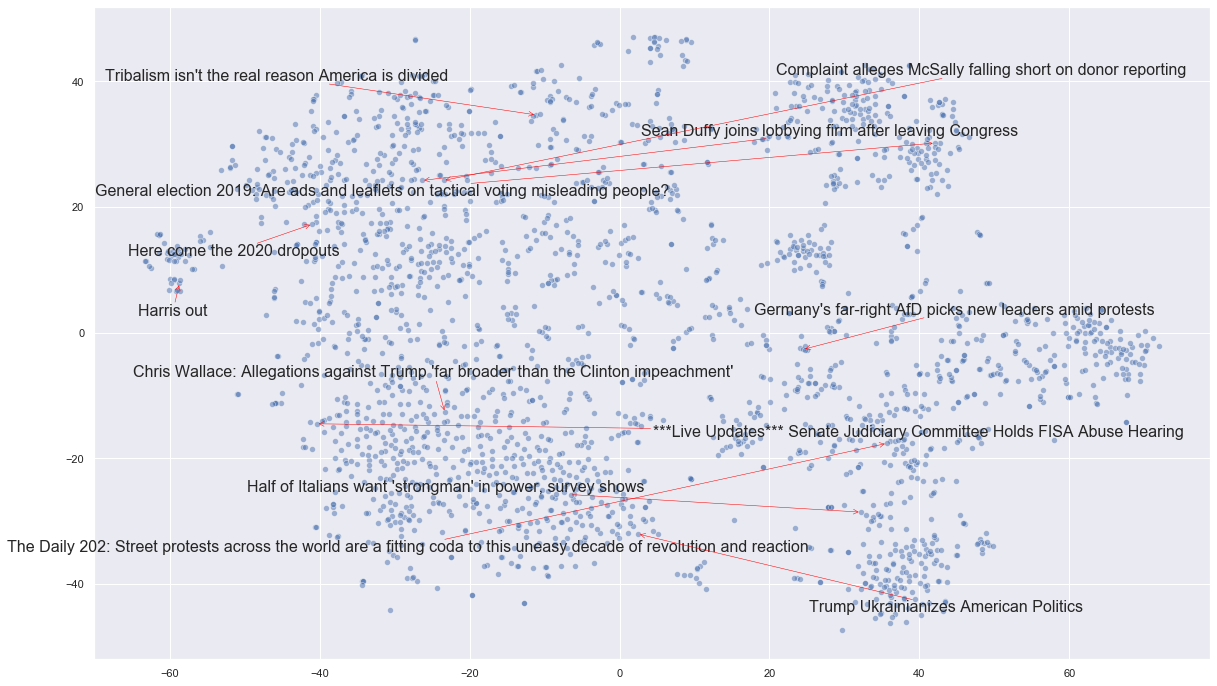

In [43]:
plot_tsne(USE_embeddings,30,df)

Since we extracted the topics with keyword like politics, elections and world politics, it will be difficult to notice any clear cluster in the embeddings as the topics are interelated. What is interesting to notice is how t-SNE converts and places a high demential document vector in a 2-Dimentional space and how each document differs from another.


<a id='w2v'></a>

# Word2Vec

Another embedding converter. Word2vec is also a famous word to vector converter. We implement word2vec just to check any performance differences.

Word2vec is a group of related models that are used to produce word embeddings. These models are shallow, two-layer neural networks that are trained to reconstruct linguistic contexts of words. Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located close to one another in the space. Word2vec was created and published in 2013 by a team of researchers led by Tomas Mikolov at Google and patented.
    -- Wikipedia
    
    
We use a pre trained google news model trained on about a 100 billion words. Source: https://code.google.com/archive/p/word2vec/

The trained model can be downloaded from:
https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

This model generates 300-Dimensional word vectors. Since its a pre-trained model we check each word is in the vocabulary of the model before generating a vector.

In [44]:
from gensim.models import Word2Vec
import gensim

C:\Users\sayee\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [45]:
# Loading the word2vec model with the pre-trained model which should be downloaded on your local system. Feel free to change the path if required.
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

C:\Users\sayee\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [46]:
# function to generate word2vec vectors for each article

article_words_list = words
def word2vec_vector(article):
    vocab_article = [word for word in article if word in word2vec_model.vocab]
    if len(vocab_article)>0:
        return np.mean(word2vec_model[vocab_article], axis=0)

In [47]:
W2V_embeddings = np.vstack([word2vec_vector(article) for article in article_words_list if len(article)>0])

Plotting the embeddings on a 2 dimentional vector by using t-SNE

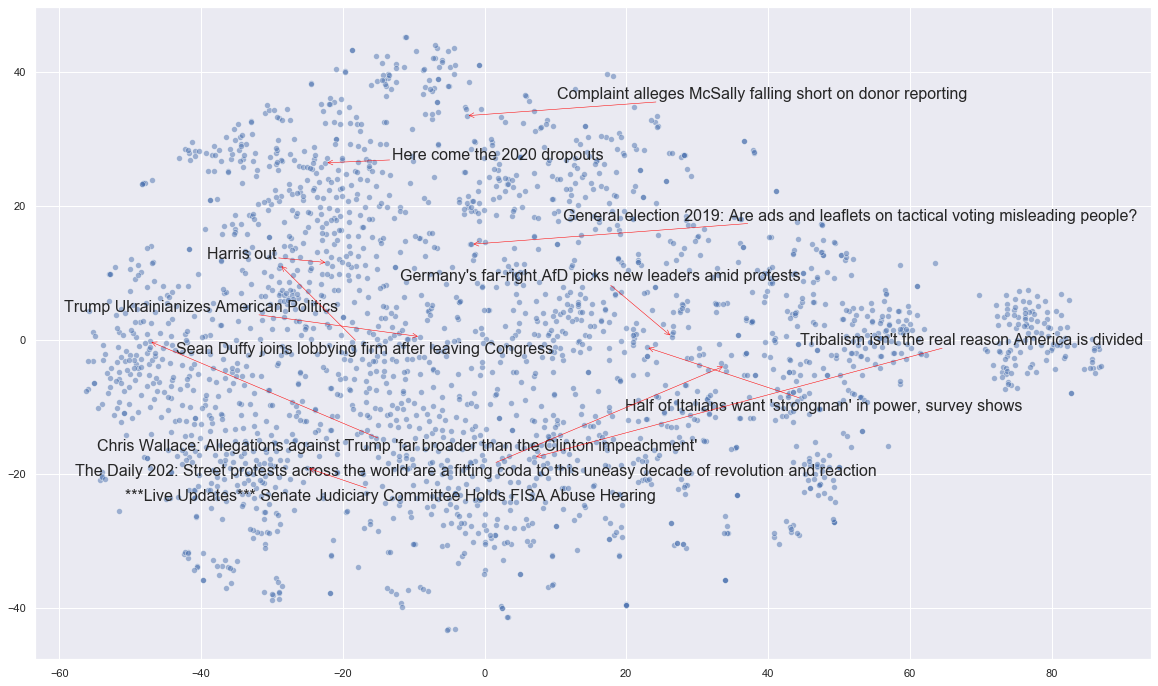

In [48]:
plot_tsne(W2V_embeddings,30,df)

<a id='LR'></a>

## Logistic Regression

Now, we will build a model to classify articles as left, right and centrally biased. To do this, we will first use multi-class classification with a Logistic Regression model and then use a deep learning model to see if the accuracy is enhanced. Logistic Regression uses a sigmoid function to model the probability of a certain class or event.  The output is a probability that the given input point belongs to a certain class. The model then classifies the point to the class with the highest probability.

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


### Logistic Regression using Universal Sentence Encoder

In [50]:
X_train, X_test, y_train, y_test = train_test_split(USE_embeddings, combined_article_index, test_size=0.33, random_state=42)
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\sayee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sayee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Let us now use the test data to predict the inclination of articles and plot a confusion matrix to visualize how the model is performing

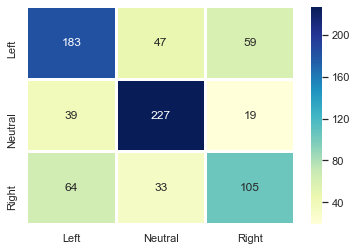

In [51]:
sns.heatmap(confusion_matrix(y_test,lr.predict(X_test)),annot=True,linewidths=2, cmap="YlGnBu",fmt="g", xticklabels=['Left','Neutral','Right'],yticklabels=['Left','Neutral','Right']) # Or change labels to ['outlet1','outlet2','outlet3','outlet4'] for outlet classifier
plt.autoscale()

The performance report of the classification matrix is as follows:

In [52]:
print(classification_report(y_test, lr.predict(X_test), target_names=['Left','Neutral','Right']))

              precision    recall  f1-score   support

        Left       0.64      0.63      0.64       289
     Neutral       0.74      0.80      0.77       285
       Right       0.57      0.52      0.55       202

   micro avg       0.66      0.66      0.66       776
   macro avg       0.65      0.65      0.65       776
weighted avg       0.66      0.66      0.66       776



### Logictic Regression using Word2Vec

In [53]:
# Logistic Regression with word2vec

X_train, X_test, y_train, y_test = train_test_split(W2V_embeddings, combined_article_index, test_size=0.33, random_state=42)
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\sayee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sayee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

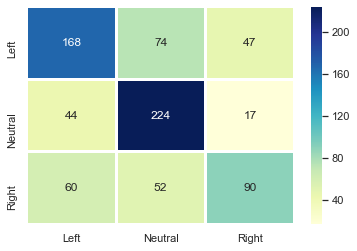

In [54]:
sns.heatmap(confusion_matrix(y_test,lr.predict(X_test)),annot=True,linewidths=2, cmap="YlGnBu",fmt="g", xticklabels=['Left','Neutral','Right'],yticklabels=['Left','Neutral','Right']) # Or change labels to ['outlet1','outlet2','outlet3','outlet4'] for outlet classifier
plt.autoscale()

In [55]:
print(classification_report(y_test, lr.predict(X_test), target_names=['Left','Neutral','Right']))

              precision    recall  f1-score   support

        Left       0.62      0.58      0.60       289
     Neutral       0.64      0.79      0.71       285
       Right       0.58      0.45      0.51       202

   micro avg       0.62      0.62      0.62       776
   macro avg       0.61      0.60      0.60       776
weighted avg       0.62      0.62      0.61       776



<a id='DL'></a>

## Deep Learning Model

The deep learning model we build will have the following features:

- 2 layers
- Adam Optimizer with learning rate 0.00015
- 40 neurons per layer
- the rectified linear unit activation function


### Deep Learning using Universal Sentence Encoder


In [73]:
optim = optimizers.Adam(lr=0.00015) 

# create neural network with 40 neurons per layer and 2 dense layers. 
bias_dnn = Sequential()
# We know that universal sentence
bias_dnn.add(Dense(40, input_dim=512, activation = 'relu',kernel_regularizer=l2(0.1)))
bias_dnn.add(Dropout(0.25))
bias_dnn.add(Dense(40, activation = 'relu',kernel_regularizer=l2(0.1)))
bias_dnn.add(Dropout(0.25))

# Multiclass Activation
bias_dnn.add(Dense(4,activation='softmax'))
bias_dnn.compile(loss='sparse_categorical_crossentropy', optimizer=optim, metrics=['acc'])

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33)
for t, te in sss.split(USE_embeddings,combined_article_index):
#   Scaling the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(USE_embeddings)[t]
    X_test = scaler.fit_transform(USE_embeddings)[te]
    y_train = combined_article_index[t]
    y_test = combined_article_index[te]
    

Here is a summary of our deep learning model

In [74]:
bias_dnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 40)                20520     
_________________________________________________________________
dropout_4 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 40)                1640      
_________________________________________________________________
dropout_5 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 164       
Total params: 22,324
Trainable params: 22,324
Non-trainable params: 0
_________________________________________________________________


In [75]:
fit = bias_dnn.fit(X_train, y_train, epochs=400, batch_size=32, verbose=0)

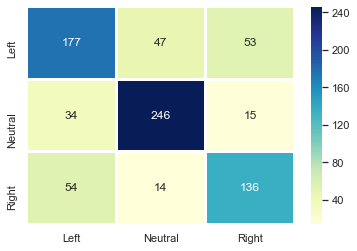

In [76]:
y_pred = bias_dnn.predict_classes(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,linewidths=2, cmap="YlGnBu",fmt="g", xticklabels=['Left','Neutral','Right'],yticklabels=['Left','Neutral','Right']) # Or change labels to ['outlet1','outlet2','outlet3','outlet4'] for outlet classifier
plt.autoscale()

In [77]:
print(classification_report(y_test, y_pred, target_names=['Left','Neutral','Right']))

              precision    recall  f1-score   support

        Left       0.67      0.64      0.65       277
     Neutral       0.80      0.83      0.82       295
       Right       0.67      0.67      0.67       204

   micro avg       0.72      0.72      0.72       776
   macro avg       0.71      0.71      0.71       776
weighted avg       0.72      0.72      0.72       776



### Deep Learning using Word2Vec

In [60]:
optim = optimizers.Adam(lr=0.00015) 

# create neural network with 40 neurons per layer and 2 dense layers. 
bias_dnn = Sequential()
# We know that universal sentence
bias_dnn.add(Dense(40, input_dim=300, activation = 'relu',kernel_regularizer=l2(0.1)))
bias_dnn.add(Dropout(0.25))
bias_dnn.add(Dense(40, activation = 'relu',kernel_regularizer=l2(0.1)))
bias_dnn.add(Dropout(0.25))

# Multiclass Activation
bias_dnn.add(Dense(4,activation='softmax'))
bias_dnn.compile(loss='sparse_categorical_crossentropy', optimizer=optim, metrics=['acc'])

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33)
for t, te in sss.split(W2V_embeddings,combined_article_index):
#   Scaling the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(W2V_embeddings)[t]
    X_test = scaler.fit_transform(W2V_embeddings)[te]
    y_train = combined_article_index[t]
    y_test = combined_article_index[te]
    

In [61]:
bias_dnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 40)                12040     
_________________________________________________________________
dropout_2 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 40)                1640      
_________________________________________________________________
dropout_3 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 164       
Total params: 13,844
Trainable params: 13,844
Non-trainable params: 0
_________________________________________________________________


In [62]:
fit = bias_dnn.fit(X_train, y_train, epochs=400, batch_size=32, verbose=0)

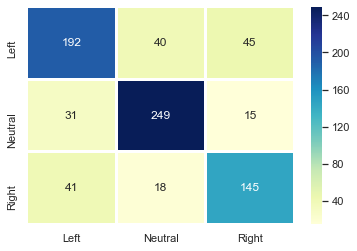

In [71]:
y_pred = bias_dnn.predict_classes(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,linewidths=2, cmap="YlGnBu",fmt="g", xticklabels=['Left','Neutral','Right'],yticklabels=['Left','Neutral','Right']) # Or change labels to ['outlet1','outlet2','outlet3','outlet4'] for outlet classifier
plt.autoscale()

In [72]:
print(classification_report(y_test, y_pred, target_names=['Left','Neutral','Right']))

              precision    recall  f1-score   support

        Left       0.73      0.69      0.71       277
     Neutral       0.81      0.84      0.83       295
       Right       0.71      0.71      0.71       204

   micro avg       0.76      0.76      0.76       776
   macro avg       0.75      0.75      0.75       776
weighted avg       0.75      0.76      0.75       776



## Result Analysis

Comparing the 2 DNN models on the vector inputs we notice a marginal performance difference in terms of accuracy in the confusion matrix. This does not provide any conclusive evidence especially in this particular data set as to which embedding performs better. This could be majorly due to less data for the deep learning module.

Let us now plot pie charts to analyze how many out articles were predicted correctly by our model per source. We will also go ahead to analyse if these sources are truly biased as stated by AllSides.

To do that, we us first see how many of the articles were predicted correctly using a groupby

In [64]:
test_df = pd.DataFrame(df.iloc[te,:])
test_df['predicted'] = y_pred

In [65]:
grouped_test = test_df.groupby(["source_id","predicted"])["predicted"].count()
grouped_test

source_id                  predicted
al-jazeera-english         0            35
                           1            15
                           2             5
associated-press           0             9
                           1            69
                           2             4
bbc-news                   0             6
                           1            66
                           2             2
breitbart-news             0            17
                           1             8
                           2            55
cnn                        0            54
                           1             7
                           2            17
fox-news                   0             8
                           1             7
                           2            61
national-review            0            15
                           1             2
                           2            24
reuters                    0             5
                 

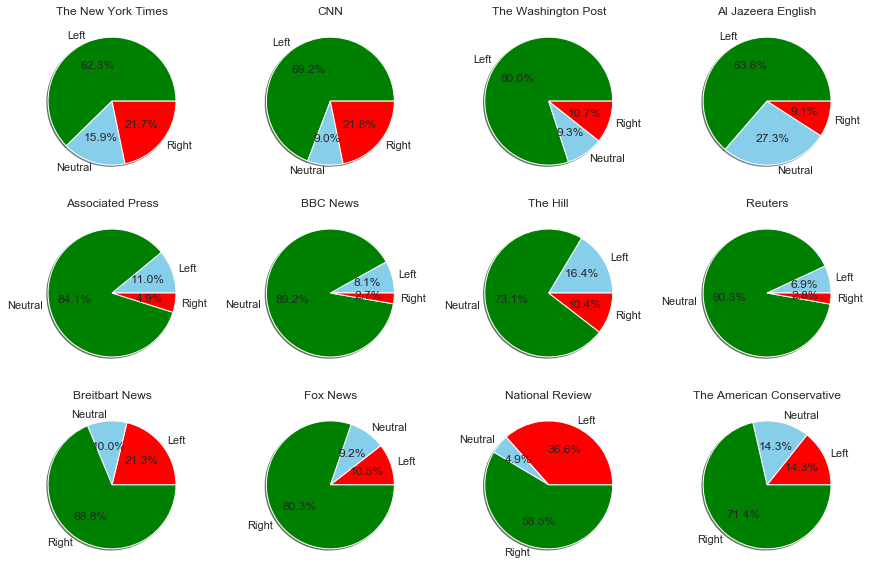

In [78]:
fig, axs = plt.subplots(3, 4,figsize=(15,10))


labels = 'Left','Neutral', 'Right'
sizes = grouped_test["the-new-york-times"]
axs[0, 0].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, colors=['green','skyblue','red'])
axs[0, 0].title.set_text('The New York Times')

sizes = grouped_test["cnn"]
axs[0, 1].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, colors=['green','skyblue','red'])
axs[0, 1].title.set_text('CNN')

sizes = grouped_test["the-washington-post"]
axs[0, 2].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, colors=['green','skyblue','red'])
axs[0, 2].title.set_text('The Washington Post')

sizes = grouped_test["al-jazeera-english"]
axs[0, 3].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, colors=['green','skyblue','red'])
axs[0, 3].title.set_text('Al Jazeera English')



sizes = grouped_test["associated-press"]
axs[1, 0].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, colors=['skyblue','green','red'])
axs[1, 0].title.set_text('Associated Press')

sizes = grouped_test["bbc-news"]
axs[1, 1].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, colors=['skyblue','green','red'])
axs[1, 1].title.set_text('BBC News')

sizes = grouped_test["the-hill"]
axs[1, 2].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, colors=['skyblue','green','red'])
axs[1, 2].title.set_text('The Hill')

sizes = grouped_test["reuters"]
axs[1, 3].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, colors=['skyblue','green','red'])
axs[1, 3].title.set_text('Reuters')



sizes = grouped_test["breitbart-news"]
axs[2, 0].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, colors=['red','skyblue','green'])
axs[2, 0].title.set_text('Breitbart News')

sizes = grouped_test["fox-news"]
axs[2, 1].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, colors=['red','skyblue','green'])
axs[2, 1].title.set_text('Fox News')

sizes = grouped_test["national-review"]
axs[2, 2].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, colors=['red','skyblue','green'])
axs[2, 2].title.set_text('National Review')

sizes = grouped_test["the-american-conservative"]
axs[2, 3].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, colors=['red','skyblue','green'])
axs[2, 3].title.set_text('The American Conservative')

plt.show()


Interesting! 
We can observe that in almost all three segments the model nearly learns the writing pattern. This is an interesting takeaway from this project. These pie charts give us a good understanding of how accurately our initial hypothesis was for predicting article bias. Based on the number of articles correctly predicted, we can see that The Washington Post is the most left biased media source, Reuters is the most neutral source and Fox News is the most right biased media source, which is well known.

<a id='Conclusion'></a>

## Conslusion

Media bias is when journalists and producers let their bias show in their written articles, the topics they speak about and the ways the events are reported. Media biases can have a strong influence on the opinions of the viewers. This is one of the reasons the public's confidence in the news channels has hit a new low. The news articles today consist less of "reporting" and more of journalists vehemently expressing their opinions through a public channel. 

For this project, we initially retrieved articles from Newsapi and then the articles content using newspaper3k and the url. Subsequently, we get the media biases from AllSides.com. After performing basic Exploratory analysis and visualization, we convert the articles into vector embeddings using two methods the Word2Vec (300 features) and Universal Sentence Encoder (512 features). We then visualize these embeddings by converting the features into a 2 dimentional space using t-SNE. 

Moving forward, we trained two models, Logistic Regression and a Deep Learning model to predict the bias of a given article from the test set. We compared the accuracy obtained from the two embedding methods methods on the two models, and the Deep Learning model with Word2Vec gave us an highest accurracy. 

### Future Work

Having extracted and comhrehended our data, our model learns how each biased source writes its articles. This model can be further improved by adding enough data for the deep learning model to show precise results.

Additionally, to train the model better, it will be interesting to get a viewers poll on the biases of each media. By taking viewers' opinions, we will be able to formulate a more nuanced initial hypothesis that can be later used for testing and predicting article bias.

The use of such study can be pivotal in understanding the writing style of any medium and predicting its bias towards any topic. Also a well trained model of the above implementation can help classify the content of a new source towards a bias.

<a id='References'></a>

## References


Media Bias: https://towardsdatascience.com/media-bias-detection-using-deep-learning-libraries-in-python-44efef4918d1

Political Bias: https://medium.com/linalgo/predict-political-bias-using-python-b8575eedef13

News Bias: https://towardsdatascience.com/ranking-news-bias-in-python-e9bb5d1ba93f

Text Bias: https://medium.com/towards-artificial-intelligence/text-mining-in-python-steps-and-examples-78b3f8fd913b

Sentiment: https://www.julienphalip.com/blog/identifying-bias-in-the-media-with-sentiment/

Word2vec: https://towardsdatascience.com/using-word2vec-to-analyze-news-headlines-and-predict-article-success-cdeda5f14751

Perplexity: https://distill.pub/2016/misread-tsne/

All Sides: https://www.allsides.com/unbiased-balanced-news
